In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df= pd.read_csv(r"C:\Users\vinit\OneDrive\Desktop\Data Analyst\Datasets\top-5000-youtube-channels(1).csv")

In [4]:
df

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views
0,1st,A++,Zee TV,82757,18752951,20869786591
1,2nd,A++,T-Series,12661,61196302,47548839843
2,3rd,A++,Cocomelon - Nursery Rhymes,373,19238251,9793305082
3,4th,A++,SET India,27323,31180559,22675948293
4,5th,A++,WWE,36756,32852346,26273668433
...,...,...,...,...,...,...
4995,"4,996th",B+,Uras Benlioğlu,706,2072942,441202795
4996,"4,997th",B+,HI-TECH MUSIC LTD,797,1055091,377331722
4997,"4,998th",B+,Mastersaint,110,3265735,311758426
4998,"4,999th",B+,Bruce McIntosh,3475,32990,14563764


# Get Information About Our Dataset Like Total Number Rows, Total Number of Columns, Datatypes of Each Column And Memory Requirement

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Rank           5000 non-null   object
 1   Grade          5000 non-null   object
 2   Channel name   5000 non-null   object
 3   Video Uploads  5000 non-null   object
 4   Subscribers    5000 non-null   object
 5   Video views    5000 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 234.5+ KB


# Get Overall Statistics About The Dataframe

In [8]:
pd.options.display.float_format = '{:.2f}'.format
df.describe()

,Video views
count,5000.00
mean,1071449400.15
std,2003843972.12
min,75.00
25%,186232945.75
50%,482054780.00
75%,1124367826.75
max,47548839843.00


# Data Cleaning  (Replace '--'  to NaN)

In [10]:
df["Subscribers"].value_counts()

--          387
666561        2
92158         2
18752951      1
814631        1
           ... 
319155        1
509852        1
2215625       1
2699400       1
21172         1
Name: Subscribers, Length: 4612, dtype: int64

In [11]:
df = df.replace("--",np.nan,regex=True)

In [12]:
len(df[df["Subscribers"]=="--"])

0

# Check Null Values In The Dataset

In [14]:
df.isnull().sum()

Rank               0
Grade              0
Channel name       0
Video Uploads      6
Subscribers      387
Video views        0
dtype: int64

In [15]:
per_missing = df.isnull().sum()*100/len(df)

In [16]:
per_missing

Rank            0.00
Grade           0.00
Channel name    0.00
Video Uploads   0.12
Subscribers     7.74
Video views     0.00
dtype: float64

In [17]:
df.dropna(axis= 0,inplace = True)

In [18]:
df.isnull().sum()

Rank             0
Grade            0
Channel name     0
Video Uploads    0
Subscribers      0
Video views      0
dtype: int64

# Data Cleaning [ Rank Column ]

In [20]:
df.dtypes

Rank             object
Grade            object
Channel name     object
Video Uploads    object
Subscribers      object
Video views       int64
dtype: object

In [21]:
df["Rank"] = df["Rank"].str.replace("th","")
df["Rank"] = df["Rank"].str.replace("nd","")
df["Rank"] = df["Rank"].str.replace("rd","")
df["Rank"] = df["Rank"].str.replace("st","")

In [22]:
df.head()

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views
0,1,A++,Zee TV,82757,18752951,20869786591
1,2,A++,T-Series,12661,61196302,47548839843
2,3,A++,Cocomelon - Nursery Rhymes,373,19238251,9793305082
3,4,A++,SET India,27323,31180559,22675948293
4,5,A++,WWE,36756,32852346,26273668433


In [23]:
df.tail()

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views
4995,"4,996",B+,Uras Benlioğlu,706,2072942,441202795
4996,"4,997",B+,HI-TECH MUSIC LTD,797,1055091,377331722
4997,"4,998",B+,Mastersaint,110,3265735,311758426
4998,"4,999",B+,Bruce McIntosh,3475,32990,14563764
4999,"5,000",B+,SehatAQUA,254,21172,73312511


In [24]:
df["Rank"] = df["Rank"].str.replace(",","")

In [25]:
df.tail()

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views
4995,4996,B+,Uras Benlioğlu,706,2072942,441202795
4996,4997,B+,HI-TECH MUSIC LTD,797,1055091,377331722
4997,4998,B+,Mastersaint,110,3265735,311758426
4998,4999,B+,Bruce McIntosh,3475,32990,14563764
4999,5000,B+,SehatAQUA,254,21172,73312511


In [26]:
df["Rank"] = df["Rank"].astype("int64")
df.dtypes

Rank              int64
Grade            object
Channel name     object
Video Uploads    object
Subscribers      object
Video views       int64
dtype: object

# Data Cleaning [ Video Uploads & Subscribers ]

In [28]:
df.head()

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views
0,1,A++,Zee TV,82757,18752951,20869786591
1,2,A++,T-Series,12661,61196302,47548839843
2,3,A++,Cocomelon - Nursery Rhymes,373,19238251,9793305082
3,4,A++,SET India,27323,31180559,22675948293
4,5,A++,WWE,36756,32852346,26273668433


In [29]:
df["Video Uploads"]= df["Video Uploads"].astype("int64")
df["Subscribers"]= df["Subscribers"].astype("int64")

In [30]:
df.dtypes

Rank              int64
Grade            object
Channel name     object
Video Uploads     int64
Subscribers       int64
Video views       int64
dtype: object

# Make a new column name --> Avg_views and fill the value of this column with Average Views For Each Channel

In [32]:
df.columns

Index(['Rank', 'Grade', 'Channel name', 'Video Uploads', 'Subscribers',
       'Video views'],
      dtype='object')

In [33]:
df["Avg_views"] = df["Video views"]/df["Video Uploads"]

In [34]:
df.head()

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views,Avg_views
0,1,A++,Zee TV,82757,18752951,20869786591,252181.53
1,2,A++,T-Series,12661,61196302,47548839843,3755535.89
2,3,A++,Cocomelon - Nursery Rhymes,373,19238251,9793305082,26255509.60
3,4,A++,SET India,27323,31180559,22675948293,829921.62
4,5,A++,WWE,36756,32852346,26273668433,714813.05


# Find Out Top Five Channels With Maximum Number of Video Uploads

In [36]:
df.sort_values(by="Video Uploads",ascending = False).head()

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views,Avg_views
3453,3454,B+,AP Archive,422326,746325,548619569,1299.04
1149,1150,A-,YTN NEWS,355996,820108,1640347646,4607.77
2223,2224,B+,SBS Drama,335521,1418619,1565758044,4666.65
323,324,A,GMA News,269065,2599175,2786949164,10357.90
2956,2957,B+,MLB,267649,1434206,1329206392,4966.23


# Fing correlation Matrix

In [38]:
df.corr()

C:\Users\vinit\AppData\Local\Temp\ipykernel_272\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Rank,Video Uploads,Subscribers,Video views,Avg_views
Rank,1.00,-0.07,-0.38,-0.40,-0.15
Video Uploads,-0.07,1.00,0.01,0.09,-0.06
Subscribers,-0.38,0.01,1.00,0.79,0.29
Video views,-0.40,0.09,0.79,1.00,0.29
Avg_views,-0.15,-0.06,0.29,0.29,1.00


# Which Grade Has A Maximum Number of Video Uploads?

In [40]:
df["Video Uploads"].dtype

dtype('int64')

In [41]:
grd_uploades = df.groupby("Grade")["Video Uploads"].max()
grd_uploades

Grade
A       269065
A+      186194
A++     100147
A-      355996
B+      422326
Name: Video Uploads, dtype: int64

<Axes: xlabel='Grade'>

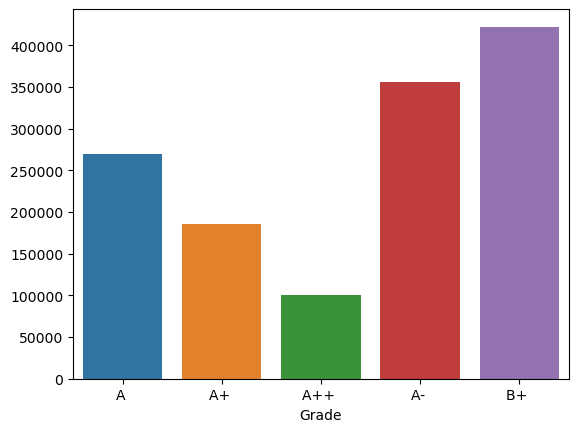

In [42]:
sns.barplot(x = grd_uploades.index, y= grd_uploades.values,data =df)

In [43]:
df.sort_values(by= "Video Uploads",ascending = False).head(1)

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views,Avg_views
3453,3454,B+,AP Archive,422326,746325,548619569,1299.04


# Which Grade Has The Highest Average Views?

In [45]:
Grd_Avg_views = df.groupby("Grade")["Avg_views"].max()
Grd_Avg_views

Grade
A      333012122.00
A+     174555664.50
A++     26255509.60
A-     211312892.12
B+     165618589.33
Name: Avg_views, dtype: float64

<Axes: xlabel='Grade'>

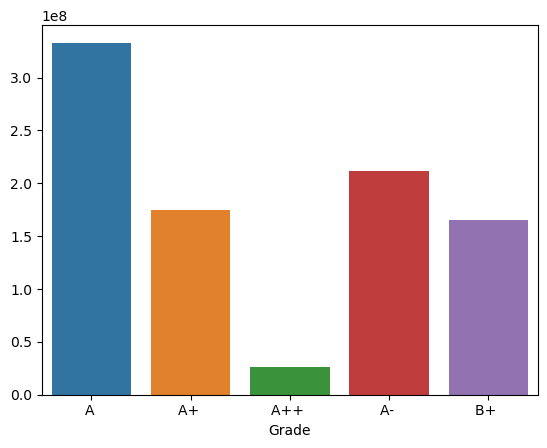

In [46]:
sns.barplot(x= Grd_Avg_views.index, y= Grd_Avg_views.values, data = df)

In [47]:
df.sort_values(by= "Avg_views",ascending = False).head(1)

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views,Avg_views
628,629,A,cocoz toon,1,2162992,333012122,333012122.00


# Which Grade Has The Highest Number of Subscribers?

In [49]:
df.groupby("Grade")["Subscribers"].max()

Grade
A       34489432
A+      39409726
A++     61196302
A-      65995310
B+      34480357
Name: Subscribers, dtype: int64

In [50]:
df.sort_values(by= "Subscribers",ascending = False).head()

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views,Avg_views
1470,1471,A-,PewDiePie,3601,65995310,18684630003,5188733.69
1,2,A++,T-Series,12661,61196302,47548839843,3755535.89
11,12,A+,Canal KondZilla,822,39409726,19291034467,23468411.76
174,175,A,Dude Perfect,185,34489432,6095981611,32951251.95
3222,3223,B+,HolaSoyGerman.,137,34480357,3617584451,26405725.92


<Axes: xlabel='Grade'>

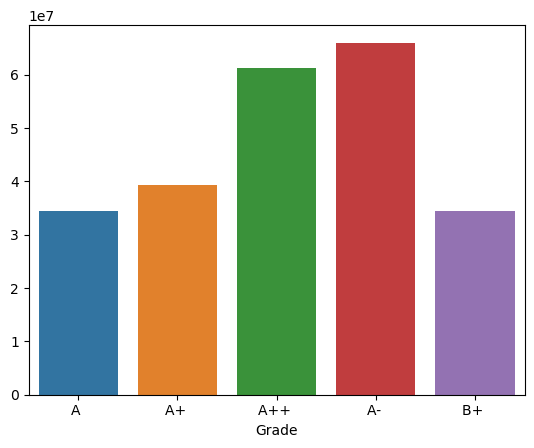

In [51]:
sns.barplot(x= df.groupby("Grade")["Subscribers"].max().index, y= df.groupby("Grade")["Subscribers"].max().values,data= df)

#  Which Grade Has The Highest Video Views? 

In [53]:
df.groupby("Grade")["Video views"].max()

Grade
A       17806717170
A+      19291034467
A++     47548839843
A-      18684630003
B+       6841746256
Name: Video views, dtype: int64

In [54]:
df.sort_values(by= "Video views",ascending = False).head(1)

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views,Avg_views
1,2,A++,T-Series,12661,61196302,47548839843,3755535.89


<Axes: xlabel='Grade'>

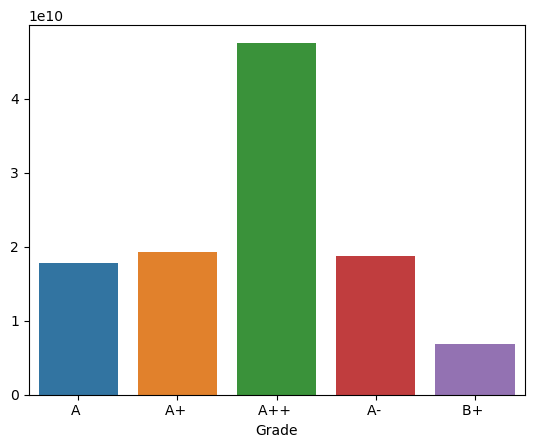

In [55]:
sns.barplot(x= df.groupby("Grade")["Video views"].max().index, y= df.groupby("Grade")["Video views"].max().values, data = df)